# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the four datasets:

- MNIST (MNIST)
- SmallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)
- Custom.mhd

**NB**: remember to modify the "config.json" file with the appropriate parameters.
**Notice**: please ensure your path is correct in dataset.py, utils folder.



In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

In [49]:
# some parameters
model_name = 'MNIST' # use custom model define in dataset.py
custom_path = 'bin/efficient_capsnetMNIST_new_train.h5' # if you've trained a new model, insert here the full graph weights path

# 1.0 Import the Dataset

In [50]:
dataset = Dataset(model_name, config_path='config.json')

type of files:  <class 'list'>
type of files:  <class 'list'>
(287, 256, 256)
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

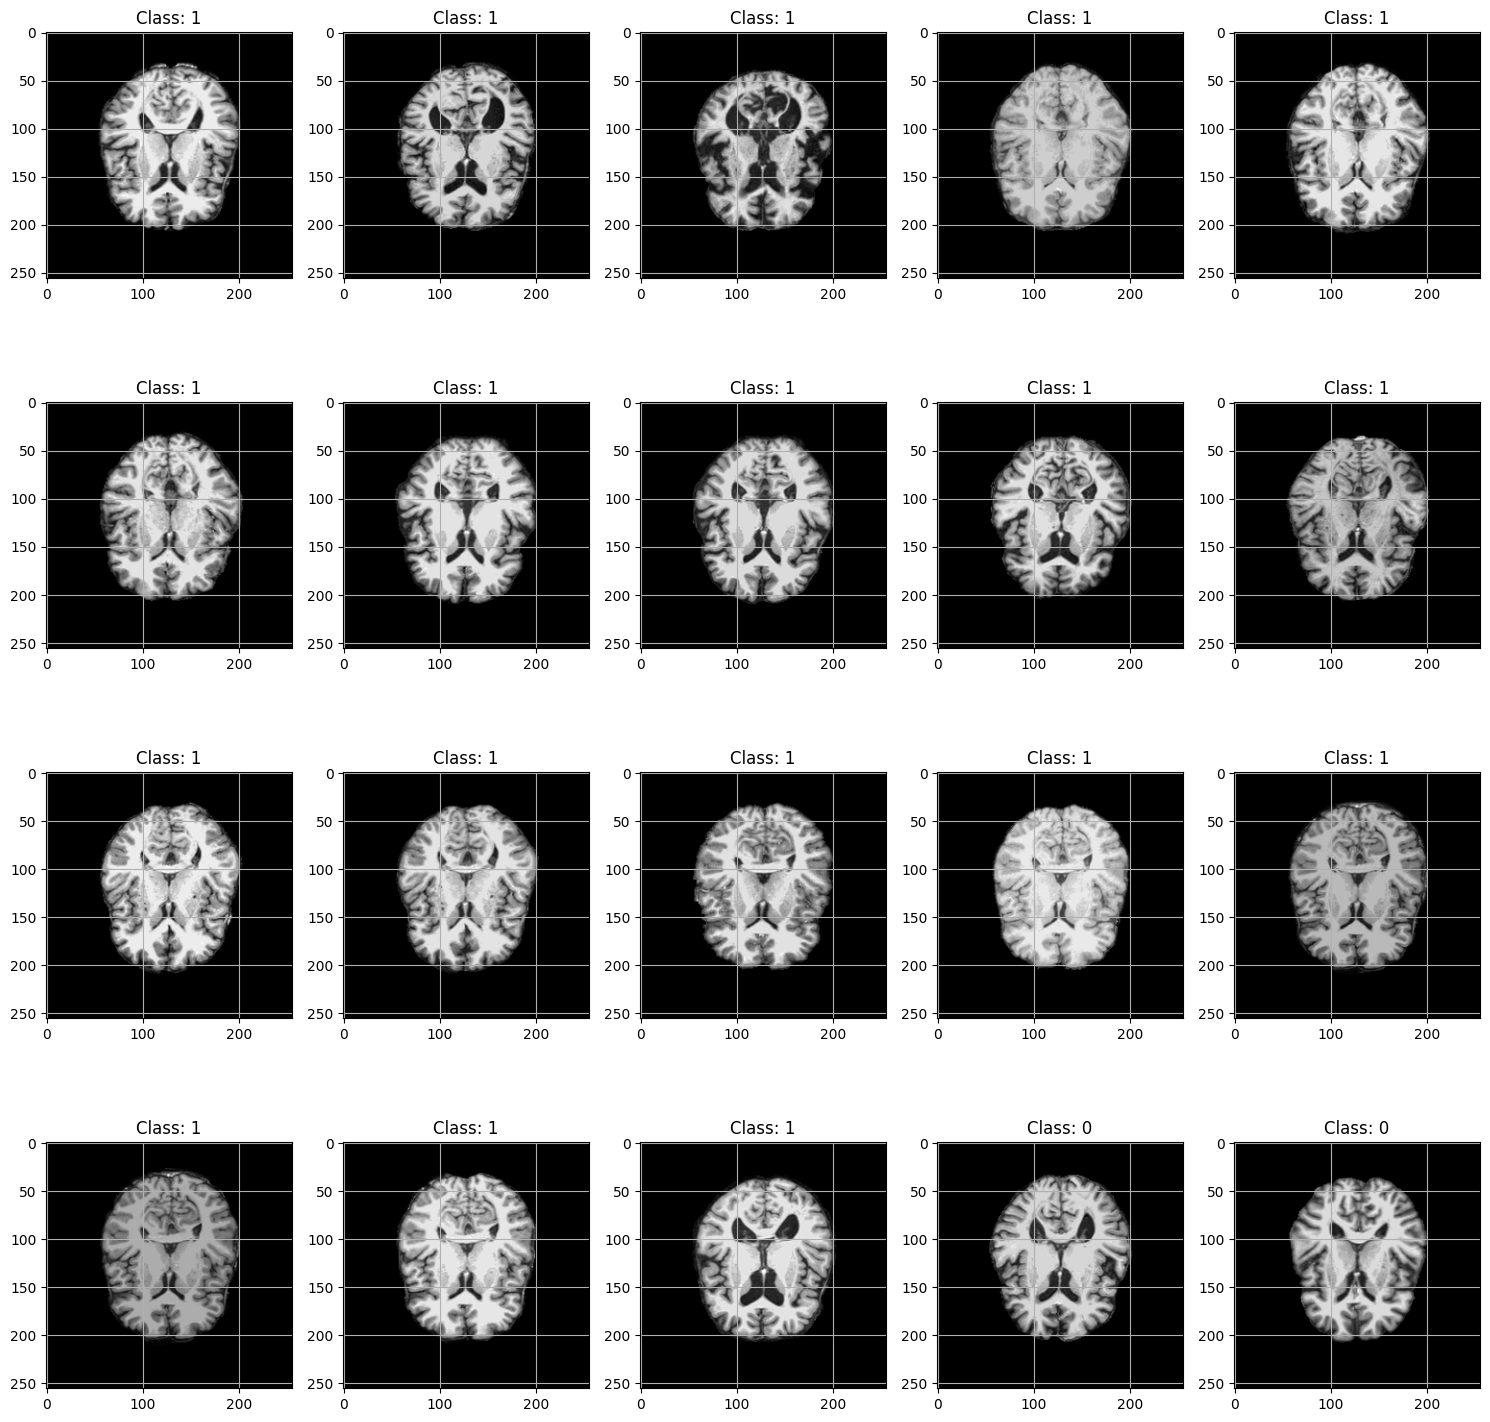

In [51]:
# based on the data, we want to show both class:1 and class:0
#
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[20:n_images+20,...,0], dataset.y_test[20:n_images+20], n_images, dataset.class_names)

# 2.0 Load the Model

In [52]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 256, 256, 1)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 127, 127, 128)     1280      
                                                                 
 batch_normalization_20 (Bat  (None, 127, 127, 128)    512       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 63, 63, 128)       147584    
                                                                 
 batch_normalization_21 (Bat  (None, 63, 63, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 31, 31, 128) 

# 3.0 Test the Model

In [53]:
model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

------------------------------MNIST Evaluation------------------------------
2/2 [==============================] - 1s 221ms/step
Test acc: 0.76
Test error [%]: 24.0000%
N° misclassified images: 12 out of 50


## 3.1 Plot misclassified images

2/2 [==============================] - 0s 189ms/step
50


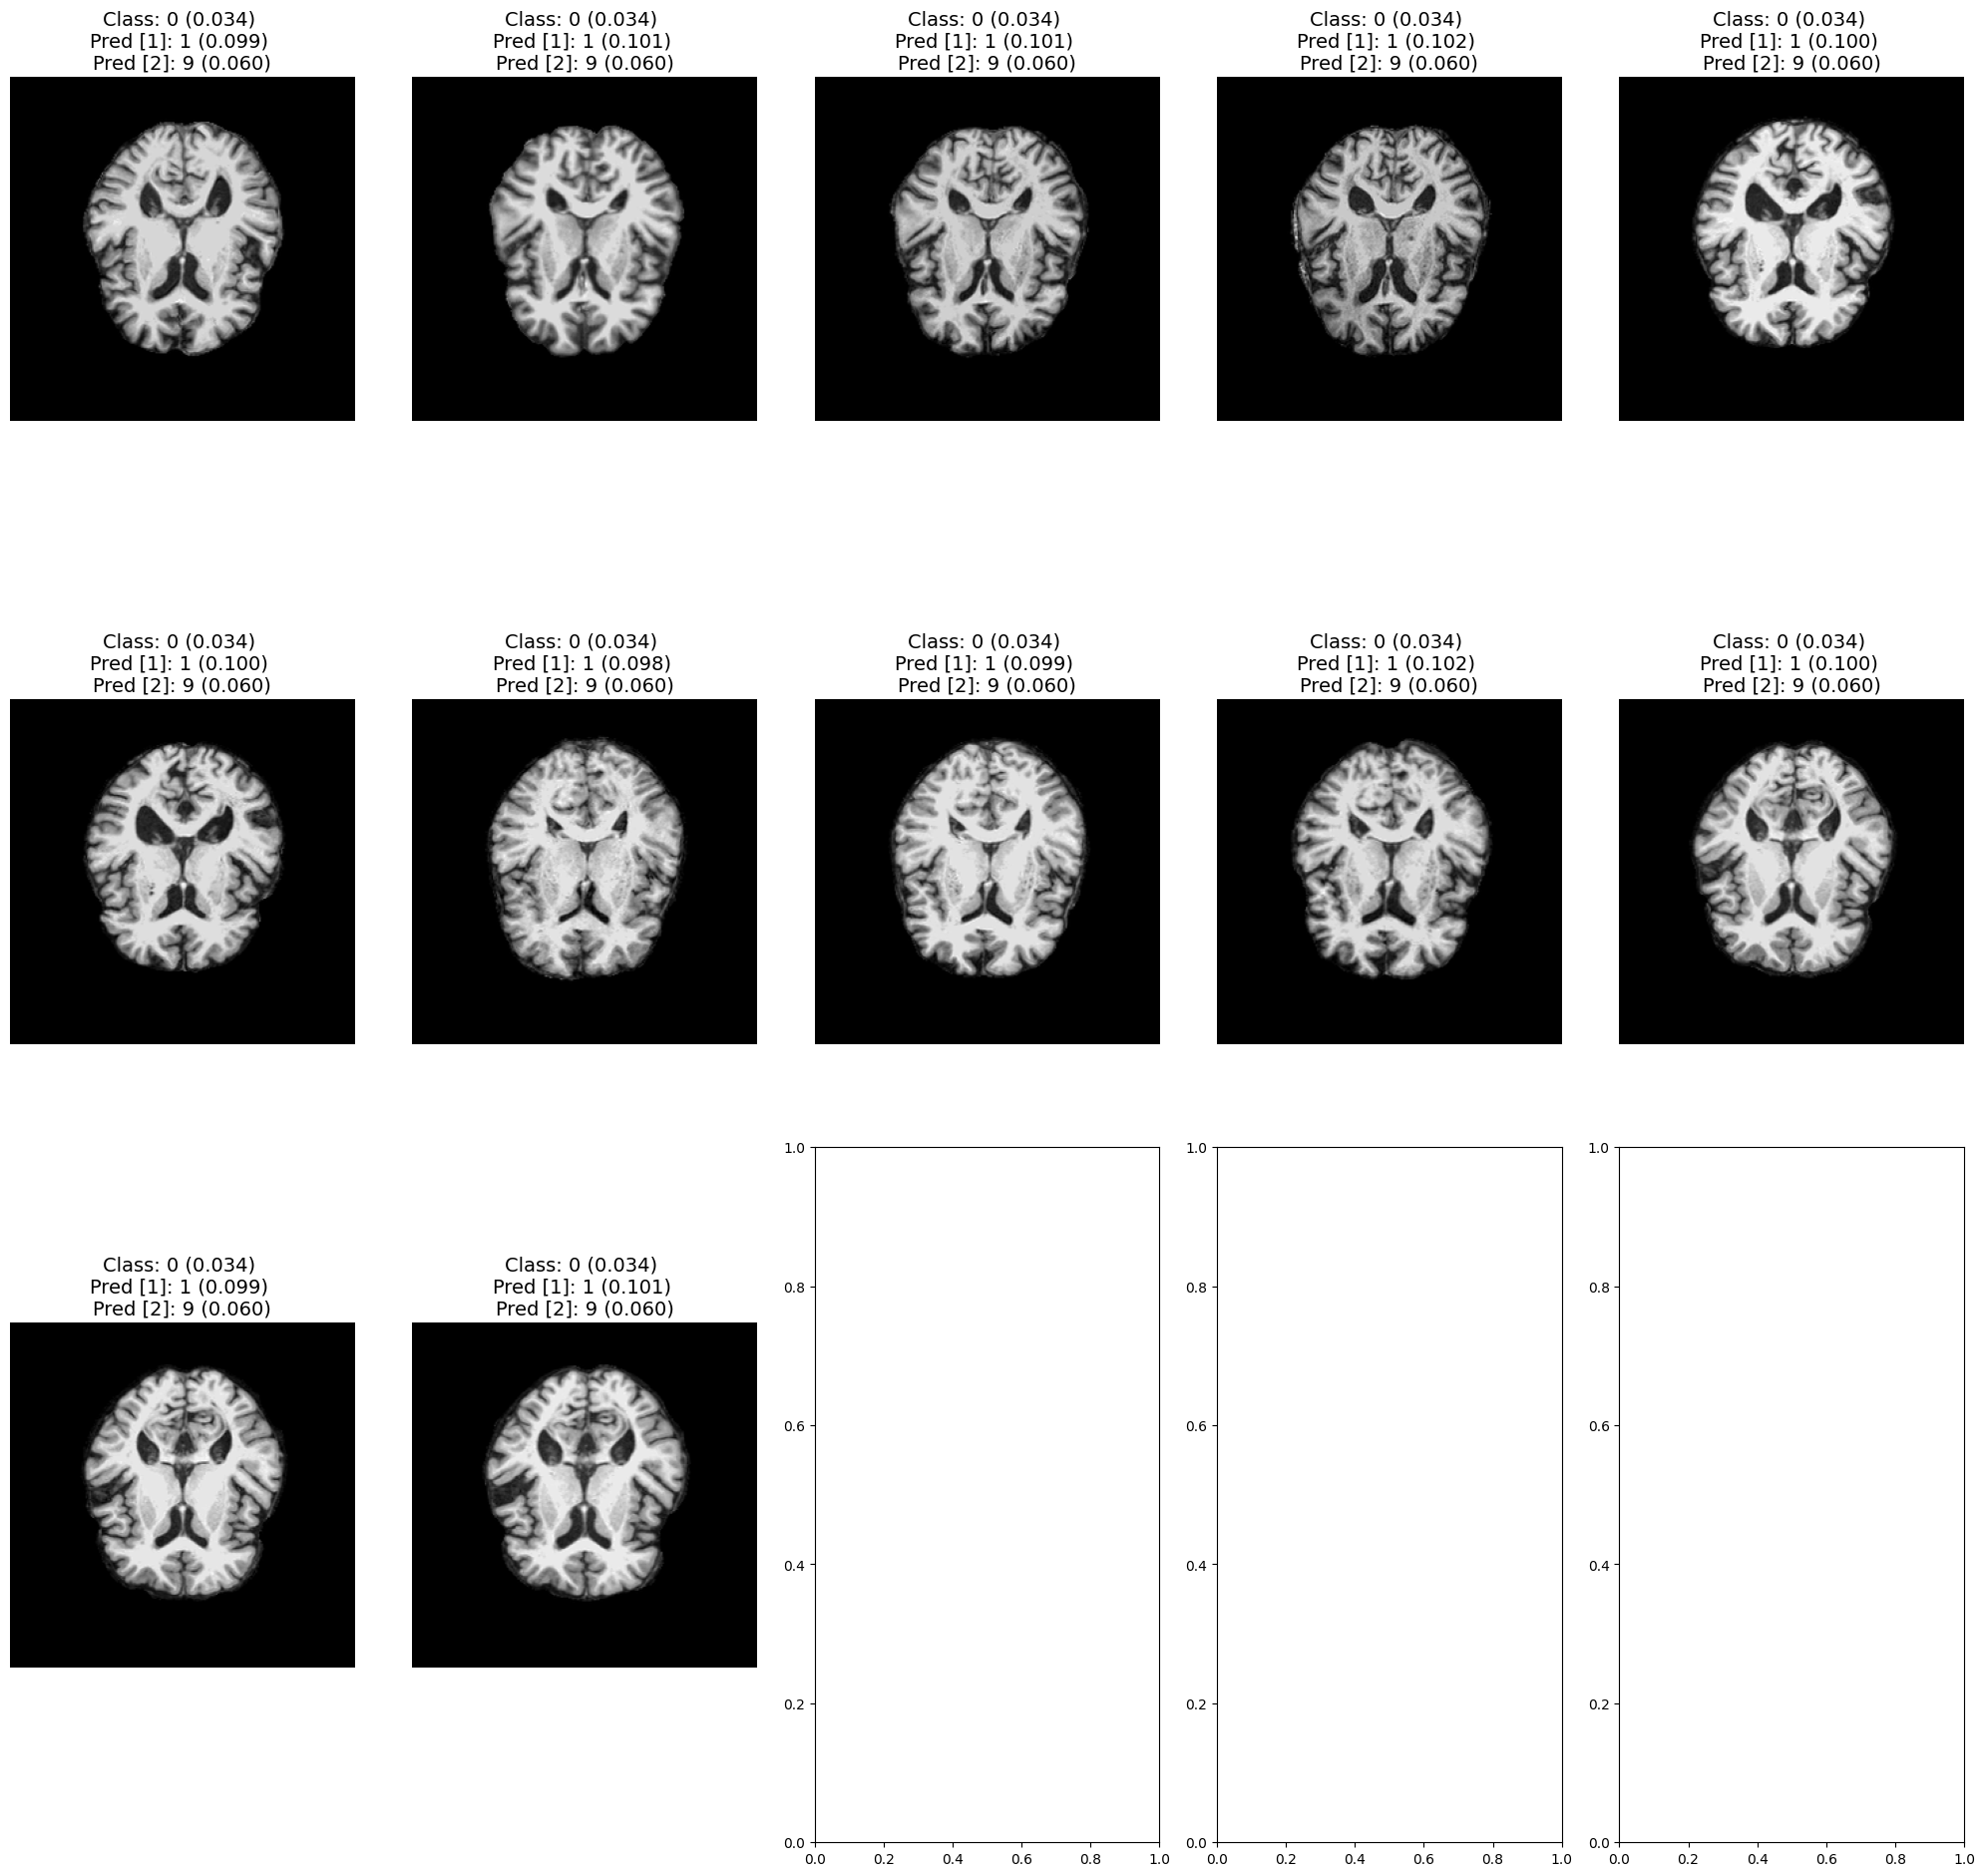

In [54]:
#not working with MultiMNIST
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch
print(len(model_test.predict(dataset.X_test)[0]))
n_images = 12
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)